In [4]:
import numpy as np
from scipy.special import expit
import matplotlib as mpl
#mpl.use('TkAgg')
import matplotlib.pyplot as plt
from imageio import imread

%matplotlib notebook

In [5]:
def add_guassian_noise(im, prop, var_sigma):
    N = int(np.round(np.prod(im.shape) * prop))

    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N], im.shape)
    e = var_sigma * np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im)
    im2[index] += e[index]
    im2[index] = 1 - im2[index]

    return im2


def add_saltnpepper_noise(im, prop):
    N = int(np.round(np.prod(im.shape) * prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N], im.shape)
    im2[index] = 1 - im2[index]

    return im2

<IPython.core.display.Javascript object>


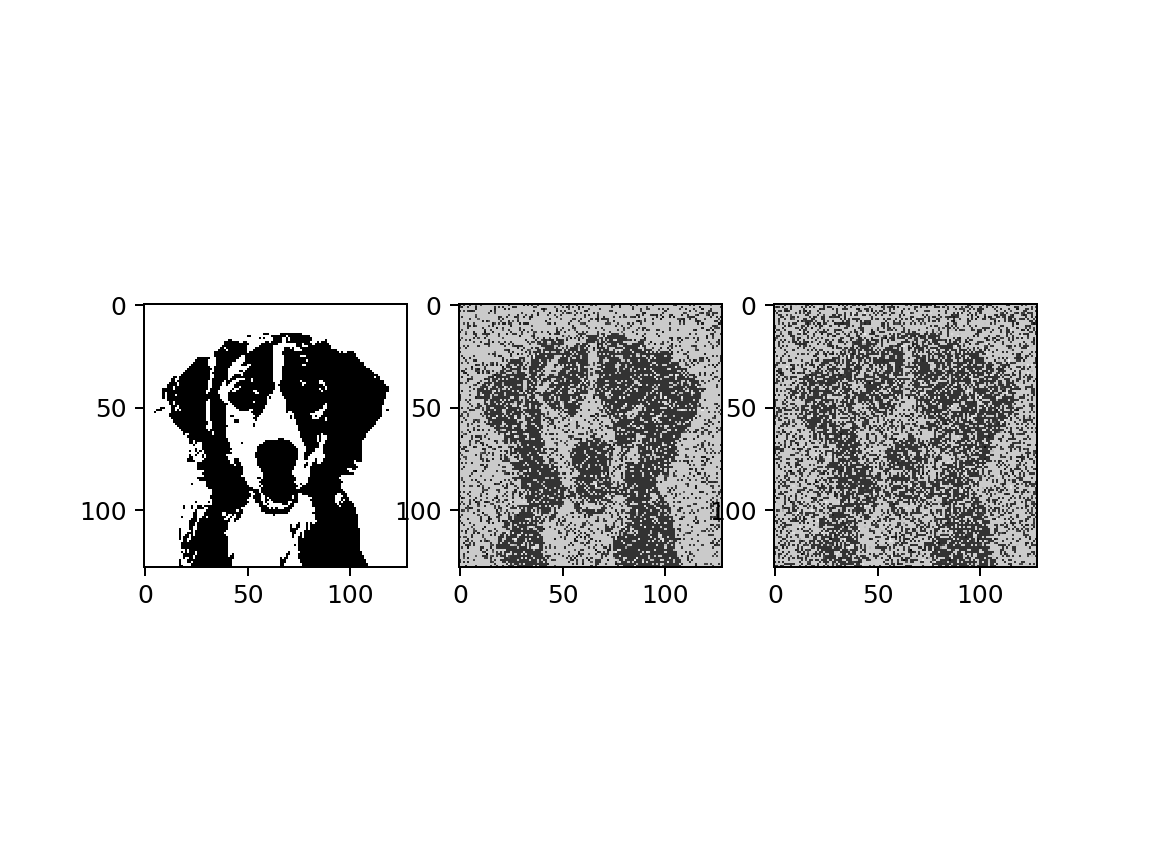

In [6]:
prop = 0.2
var_sigma = 0.1

im = imread('img/dog_face_gray.png')
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im, cmap='gray')

im2 = add_guassian_noise(im, prop, var_sigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2, cmap='gray')
im3 = add_saltnpepper_noise(im, prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im3, cmap='gray')

In [7]:
def neighbours(i, j, M, N, size=8):
    if size == 4:
        # corners
        if i == 0 and j == 0:
            n = [(0, 1), (1, 0)]
        elif i == 0 and j == N - 1:
            n = [(0, N - 2), (1, N - 1)]
        elif i == M - 1 and j == 0:
            n = [(M - 1, 1), (M - 2, 0)]
        elif i == M - 1 and j == N - 1:
            n = [(M - 1, N - 2), (M - 2, N - 1)]

        # edges
        elif i == 0:
            n = [(0, j - 1), (0, j + 1), (1, j)]
        elif i == M - 1:
            n = [(M - 1, j - 1), (M - 1, j + 1), (M - 2, j)]
        elif j == 0:
            n = [(i - 1, 0), (i + 1, 0), (i, 1)]
        elif j == N - 1:
            n = [(i - 1, N - 1), (i + 1, N - 1), (i, N - 2)]

        # everywhere else
        else:
            n = [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1)]

        return n
    
    if size == 8:
        # corners
        if i == 0 and j == 0:
            n = [(0, 1), (1, 0), (1, 1)]
        elif i == 0 and j == N - 1:
            n = [(0, N - 2), (1, N - 1), (1, N - 2)]
        elif i == M - 1 and j == 0:
            n = [(M - 1, 1), (M - 2, 0), (M - 2, 1)]
        elif i == M - 1 and j == N - 1:
            n = [(M - 1, N - 2), (M - 2, N - 1), (M - 2, N - 2)]

        # edges
        elif i == 0:
            n = [(0, j - 1), (0, j + 1), (1, j), (1, j - 1), (1, j + 1)]
        elif i == M - 1:
            n = [(M - 1, j - 1), (M - 1, j + 1), (M - 2, j), (M - 2, j - 1), (M - 2, j + 1)]
        elif j == 0:
            n = [(i - 1, 0), (i + 1, 0), (i, 1), (i - 1, 1), (i + 1, 1)]
        elif j == N - 1:
            n = [(i - 1, N - 1), (i + 1, N - 1), (i, N - 2), (i - 1, N - 2), (i + 1, N - 2)]

        # everywhere else
        else:
            n = [(i - 1, j), (i + 1, j), (i, j - 1), (i, j + 1), (i - 1, j - 1), (i - 1, j + 1), (i + 1, j + 1), (i + 1, j - 1)]
            
        return n

In [8]:
def mean_field_var_bayes(image, max_iters, num_neighs):
    w_ij = 1
    
    im_noisy = np.copy(image) * 2 - 1
#     im_noisy[im_noisy >= 0.5] = 1
#     im_noisy[im_noisy < 0.5] = -1
    
    for t in range(max_iters):
        for j in range(im_noisy.shape[0]):
            for i in range(im_noisy.shape[1]):
                neighs = neighbours(j, i, im_noisy.shape[0], im_noisy.shape[1], num_neighs)
                m = sum(w_ij * im_noisy[n_j, n_i] for n_j, n_i in neighs)
                
                im_noisy[j, i] = np.tanh(m + 0.5*(im_noisy[j, i] + im_noisy[j, i]))
                
    return im_noisy
    

<IPython.core.display.Javascript object>


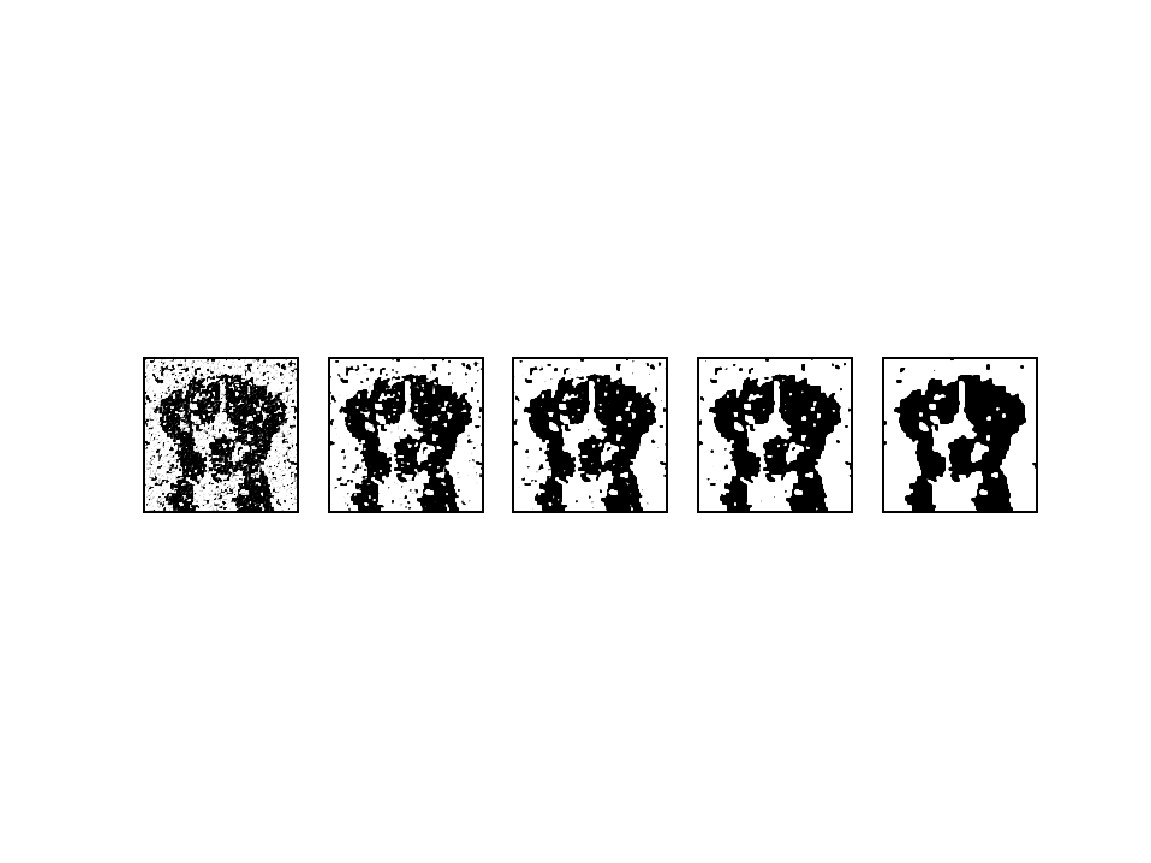

In [9]:
i = im2

im_out1 = mean_field_var_bayes(i, 1, 4)
im_out2 = mean_field_var_bayes(i, 2, 4)
im_out3 = mean_field_var_bayes(i, 3, 4)
im_out4 = mean_field_var_bayes(i, 4, 4)
im_out5 = mean_field_var_bayes(i, 10, 4)

fig = plt.figure()

ax = fig.add_subplot(151)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.imshow(im_out1, cmap='gray')

ax = fig.add_subplot(152)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.imshow(im_out2, cmap='gray')

ax = fig.add_subplot(153)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.imshow(im_out3, cmap='gray')

ax = fig.add_subplot(154)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.imshow(im_out4, cmap='gray')

ax = fig.add_subplot(155)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.imshow(im_out5, cmap='gray')

fig.savefig('img/variational_bayes8.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


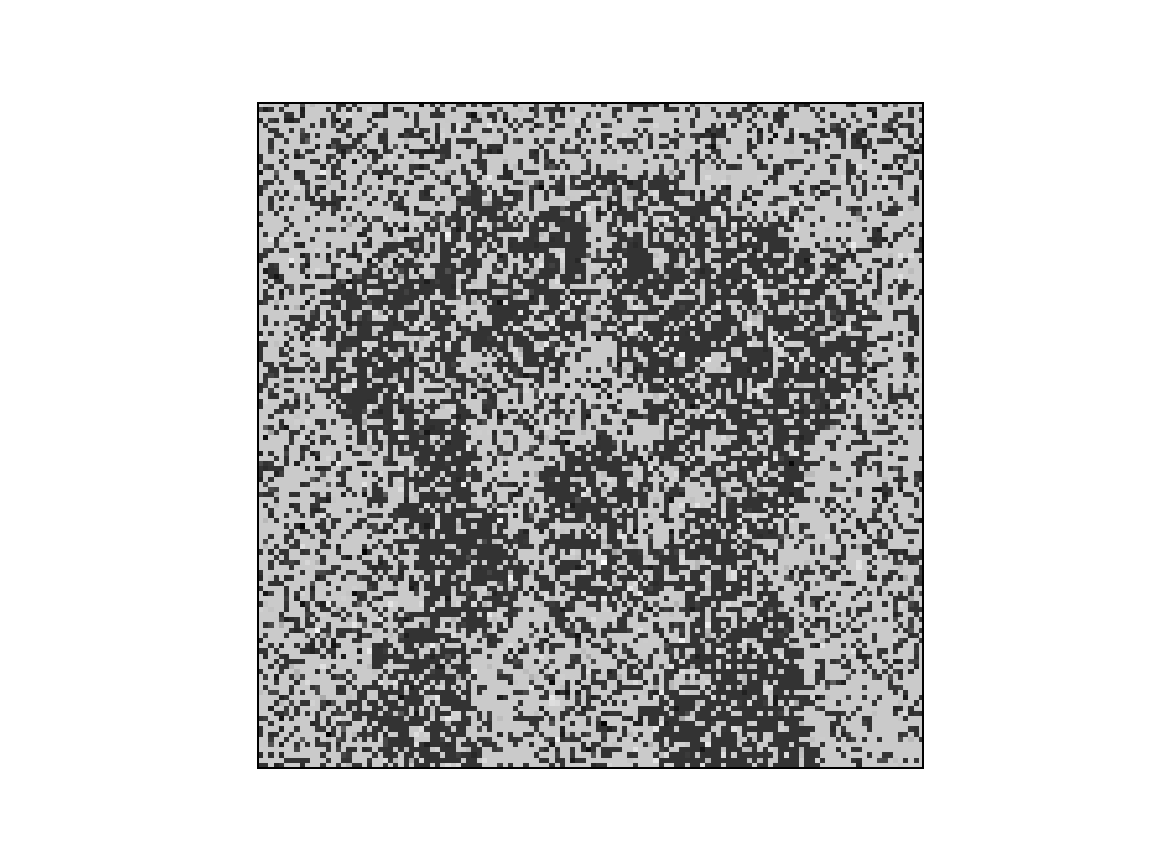

In [10]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.imshow(i, cmap='gray')

fig2.savefig('img/noisy.png', bbox_inches='tight')